In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
hospital_attendance = pd.read_csv("hospital attendance.csv")

In [3]:
#Display basic infomation
hospital_attendance.head()
hospital_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Hypertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handicap        110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


In [3]:
# Convert ScheduledDay and AppointmentDay to datetime format
hospital_attendance["ScheduledDay"] = pd.to_datetime(hospital_attendance["ScheduledDay"])
hospital_attendance["AppointmentDay"] = pd.to_datetime(hospital_attendance["AppointmentDay"])

In [4]:
# Check for missing values
print(hospital_attendance.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64


In [5]:
# Remove negative age record
hospital_attendance = hospital_attendance[hospital_attendance["Age"]>=0]

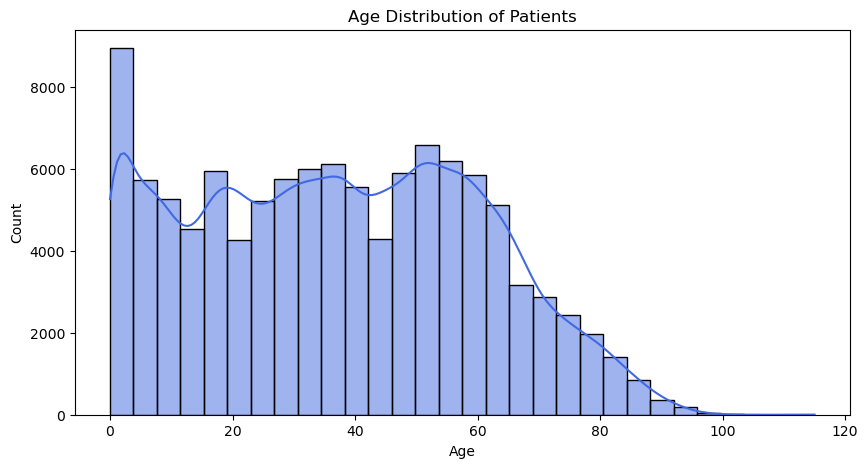

In [10]:
#Plot age distribution
plt.figure(figsize=(10,5))
sns.histplot(hospital_attendance["Age"], bins=30, kde=True, color="royalblue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.show()

In [6]:
# Convert "No-show" column to numerical format
hospital_attendance["No-show"] = hospital_attendance["No-show"].map({"No": 0, "Yes": 1})

In [7]:
# Calculate no-show rate
no_show_rate = hospital_attendance["No-show"].mean() * 100
print(f"Overall No-show Rate: {no_show_rate:.2f}%")

Overall No-show Rate: 20.19%


In [8]:
# No-show rate by SMS received
sms_no_show = hospital_attendance.groupby("SMS_received")["No-show"].mean() * 100
print("No-show Rate by SMS Received:")
print(sms_no_show)

No-show Rate by SMS Received:
SMS_received
0    16.703534
1    27.574545
Name: No-show, dtype: float64


In [9]:
# No-show rate by medical conditions
medical_conditions = ["Hypertension", "Diabetes", "Alcoholism", "Handicap"]
medical_no_show = hospital_attendance.groupby(medical_conditions)["No-show"].mean().reset_index()
print("No-show Rate by Medical Conditions:")
print(medical_no_show)

No-show Rate by Medical Conditions:
    Hypertension  Diabetes  Alcoholism  Handicap   No-show
0              0         0           0         0  0.209276
1              0         0           0         1  0.201287
2              0         0           0         2  0.134021
3              0         0           0         3  0.222222
4              0         0           0         4  0.333333
5              0         0           1         0  0.216441
6              0         0           1         1  0.096774
7              0         0           1         2  1.000000
8              0         0           1         3  0.000000
9              0         1           0         0  0.203579
10             0         1           0         1  0.076923
11             0         1           0         2  0.000000
12             0         1           1         0  0.160000
13             0         1           1         1  1.000000
14             1         0           0         0  0.170168
15             1    

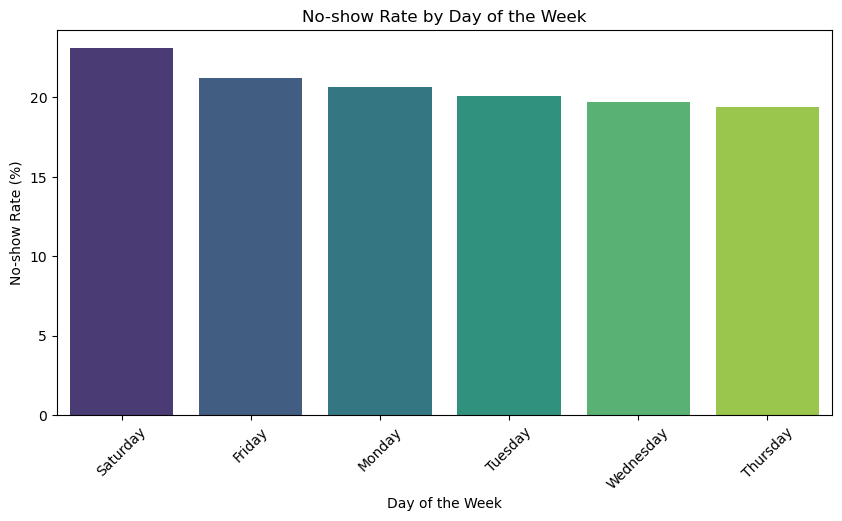

In [10]:
# No-show rate by day of the week
hospital_attendance["Appointment_DayOfWeek"] = hospital_attendance["AppointmentDay"].dt.day_name()
day_no_show = hospital_attendance.groupby("Appointment_DayOfWeek")["No-show"].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=day_no_show.index, y=day_no_show.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("No-show Rate (%)")
plt.title("No-show Rate by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [11]:
# Calculate waiting time in days
hospital_attendance["Waiting_Time"] = (hospital_attendance["AppointmentDay"] - hospital_attendance["ScheduledDay"]).dt.days

# No-show rate based on waiting time
hospital_attendance["Waiting_Category"] = pd.cut(hospital_attendance["Waiting_Time"], bins=[-1, 0, 7, 30, 90, hospital_attendance["Waiting_Time"].max()],
                                labels=["Same Day", "1-7 Days", "8-30 Days", "31-90 Days", "90+ Days"])
waiting_no_show = hospital_attendance.groupby("Waiting_Category")["No-show"].mean() * 100
print("No-show Rate by Waiting Time:")
print(waiting_no_show)

No-show Rate by Waiting Time:
Waiting_Category
Same Day      21.350470
1-7 Days      25.010238
8-30 Days     31.998125
31-90 Days    33.116815
90+ Days      27.329193
Name: No-show, dtype: float64


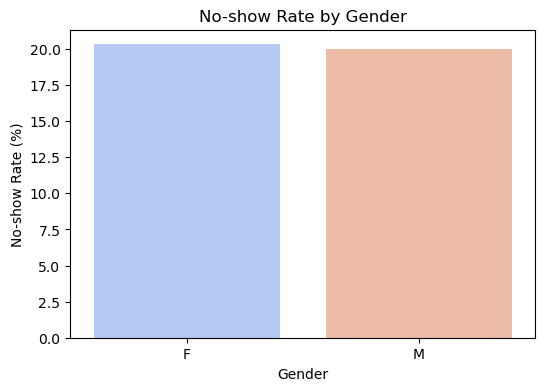

No-show Rate by Gender:
Gender
F    20.314871
M    19.967948
Name: No-show, dtype: float64


In [17]:
# No-show rate by gender
gender_no_show = hospital_attendance.groupby("Gender")["No-show"].mean() * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_no_show.index, y=gender_no_show.values, palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("No-show Rate (%)")
plt.title("No-show Rate by Gender")
plt.show()

print("No-show Rate by Gender:")
print(gender_no_show)